In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab

Carregando o dataset e selecionando as colunas a serem trabalhadas na variável **df**.

In [2]:
url_lol = 'https://raw.githubusercontent.com/michellyrds/mqaa/master/datasets/high_diamond_ranked_10min.csv'

url = url_lol
raw_data = pd.read_csv(url)

df = raw_data.filter(['blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueEliteMonsters', 'blueGoldDiff',
                     'redWardsPlaced', 'redKills', 'redDeaths', 'redEliteMonsters', 'redGoldDiff', 'gameId'], axis=1)

df = df.rename(columns={'blueWardsPlaced' : 'azulSentinelas', 
                            'blueKills' : 'azulAbates',
                            'blueDeaths' : 'azulMortes', 
                            'blueEliteMonsters' : 'azulMonstrosEpicos', 
                            'blueGoldDiff' : 'azulDiferencaOuros',
                            'redWardsPlaced' : 'vermelhoSentinelas', 
                            'redKills' : 'vermelhoAbates',
                            'redDeaths' : 'vermelhoMortes', 
                            'redEliteMonsters' : 'vermelhoMonstrosEpicos', 
                            'redGoldDiff' : 'vermelhoDiferencaOuros'})
raw_data.var()

gameId                          7.602857e+14
blueWins                        2.500244e-01
blueWardsPlaced                 3.246907e+02
blueWardsDestroyed              4.730618e+00
blueFirstBlood                  2.500022e-01
blueKills                       9.066289e+00
blueDeaths                      8.607286e+00
blueAssists                     1.652032e+01
blueEliteMonsters               3.912834e-01
blueDragons                     2.309738e-01
blueHeralds                     1.526555e-01
blueTowersDestroyed             5.971629e-02
blueTotalGold                   2.357596e+06
blueAvgLevel                    9.311397e-02
blueTotalExperience             1.441257e+06
blueTotalMinionsKilled          4.777913e+02
blueTotalJungleMinionsKilled    9.797599e+01
blueGoldDiff                    6.018922e+06
blueExperienceDiff              3.687823e+06
blueCSPerMin                    4.777913e+00
blueGoldPerMin                  2.357596e+04
redWardsPlaced                  3.406766e+02
redWardsDe

In [3]:
df.head(10)

,azulSentinelas,azulAbates,azulMortes,azulMonstrosEpicos,azulDiferencaOuros,vermelhoSentinelas,vermelhoAbates,vermelhoMortes,vermelhoMonstrosEpicos,vermelhoDiferencaOuros,gameId
0,28,9,6,0,643,15,6,9,0,-643,4519157822
1,12,5,5,0,-2908,12,5,5,2,2908,4523371949
2,15,7,11,1,-1172,15,11,7,0,1172,4521474530
3,43,4,5,1,-1321,15,5,4,0,1321,4524384067
4,75,6,6,0,-1004,17,6,6,1,1004,4436033771
5,18,5,3,1,698,36,3,5,0,-698,4475365709
6,18,7,6,1,2411,57,6,7,0,-2411,4493010632
7,16,5,13,0,-2615,15,13,5,1,2615,4496759358
8,16,7,7,0,-1979,15,7,7,2,1979,4443048030
9,13,4,5,1,-1548,16,5,4,0,1548,4509433346


# TD2 - Análise de variância

## Avaliando os requisitos e pressupostos 

- As variáveis dependentes são quantitativas?
- A distribuição das variáves dependentes segue uma distribuição normal dentro de cada grupo?
- A variância dos grupos são semelhantes?


Variáveis de interesse: azulAbates (quantidade de abates realizados pelo time azul), azulMortes (quantidade de mortes dos integrantes do time azul) vermelhoAbates e vermelhoMortes.

Dados que as variáveis são quantitativas discretas, partimos para avaliação de sua normalidade plotando o histograma dos grupos e seus gráficos Q-Q:

### Plotando os histogramas das variáveis

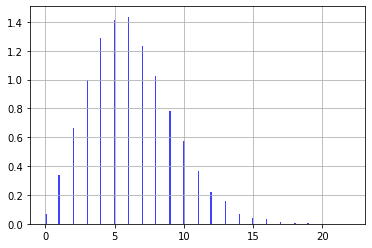

In [4]:
q25, q75 = np.percentile(df['azulAbates'], [0.25, 0.75])
bin_width = 2 * (q75 - q25) * len(df['azulAbates']) ** (-1/3)
bins = round((df['azulAbates'].max() - df['azulAbates'].min()) / bin_width)
plt.hist(df['azulAbates'], bins=bins, density=True, facecolor='b', alpha=0.75)
plt.grid(True)
plt.show()

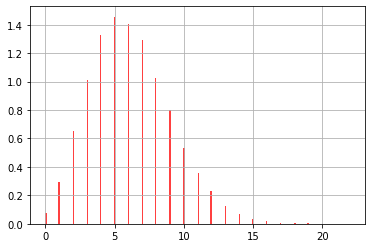

In [5]:
q25, q75 = np.percentile(df['azulMortes'], [0.25, 0.75])
bin_width = 2 * (q75 - q25) * len(df['azulMortes']) ** (-1/3)
bins = round((df['azulMortes'].max() - df['azulMortes'].min()) / bin_width)
plt.hist(df['azulMortes'], bins=bins, density=True, facecolor='r', alpha=0.75)
plt.grid(True)
plt.show()

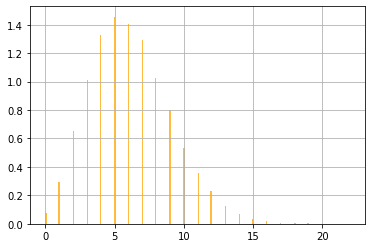

In [6]:
q25, q75 = np.percentile(df['vermelhoAbates'], [0.25, 0.75])
bin_width = 2 * (q75 - q25) * len(df['vermelhoAbates']) ** (-1/3)
bins = round((df['vermelhoAbates'].max() - df['vermelhoAbates'].min()) / bin_width)
plt.hist(df['vermelhoAbates'], bins=bins, density=True, facecolor='orange', alpha=0.75)
plt.grid(True)
plt.show()

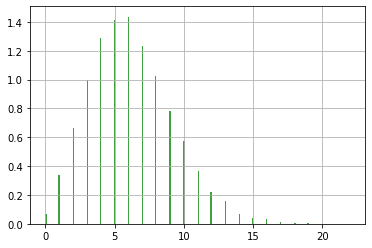

In [7]:
q25, q75 = np.percentile(df['vermelhoMortes'], [0.25, 0.75])
bin_width = 2 * (q75 - q25) * len(df['vermelhoMortes']) ** (-1/3)
bins = round((df['vermelhoMortes'].max() - df['vermelhoMortes'].min()) / bin_width)
plt.hist(df['vermelhoMortes'], bins=bins, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

### Plotando os gráficos Q-Q

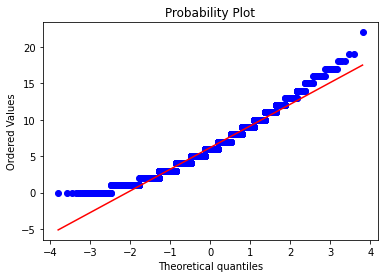

In [8]:
df_azul_abates = df.filter(['azulAbates'])
df_azul_abates = df_azul_abates.to_numpy()
df_azul_abates = np.reshape(df_azul_abates, (len(df_azul_abates),))
st.probplot(df_azul_abates, dist='norm', plot=pylab)
pylab.show()

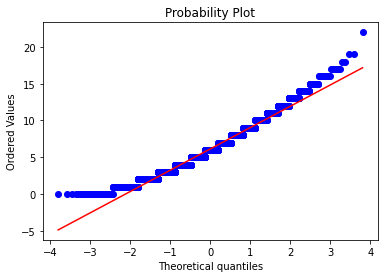

In [9]:
df_azul_mortes = df.filter(['azulMortes'])
df_azul_mortes = df_azul_mortes.to_numpy()
df_azul_mortes = np.reshape(df_azul_mortes, (len(df_azul_mortes),))
st.probplot(df_azul_mortes, dist='norm', plot=pylab)
pylab.show()

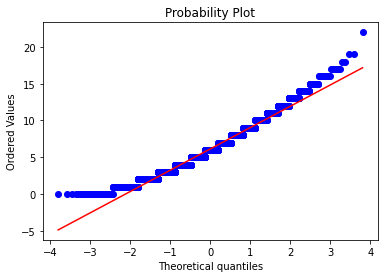

In [10]:
df_azul_abates = df.filter(['vermelhoAbates'])
df_azul_abates = df_azul_abates.to_numpy()
df_azul_abates = np.reshape(df_azul_abates, (len(df_azul_abates),))
st.probplot(df_azul_abates, dist='norm', plot=pylab)
pylab.show()

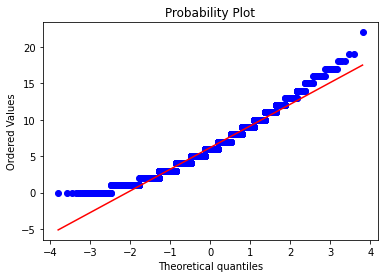

In [11]:
df_azul_abates = df.filter(['vermelhoMortes'])
df_azul_abates = df_azul_abates.to_numpy()
df_azul_abates = np.reshape(df_azul_abates, (len(df_azul_abates),))
st.probplot(df_azul_abates, dist='norm', plot=pylab)
pylab.show()

Assim, vemos que ambas variáveis possuem distribuição normal.

Por fim, avaliando sua variância: 

In [12]:
pd.set_option('display.float_format', '{:.5f}'.format)
df.var()

azulSentinelas                       324.69072
azulAbates                             9.06629
azulMortes                             8.60729
azulMonstrosEpicos                     0.39128
azulDiferencaOuros               6018922.19608
vermelhoSentinelas                   340.67660
vermelhoAbates                         8.60729
vermelhoMortes                         9.06629
vermelhoMonstrosEpicos                 0.39248
vermelhoDiferencaOuros           6018922.19608
gameId                   760285686737577.75000
dtype: float64

### Teste de Bartlett

Para testar a homocedasticidade da variância dos grupos, usaremos o teste de Bartlett (supondo a distribuição normal das variáveis).

Teste de hipótese:

**hipótese nula**: as variâncias são igual entre os grupos.  
**hipótese alternativa**: as variâncias não são iguais entre os grupos.  

(se o p-value for maior que 0.05, assumimos que os dados são heterocedástico)

In [13]:
from scipy.stats import bartlett

trt1 = df['azulAbates']
trt2 = df['vermelhoAbates']

stat, p = bartlett(trt1, trt2)

print('Teste de Bartlett\n T: {}, p-value:{}\n'.format(stat, p))

Teste de Bartlett
 T: 6.664628758360342, p-value:0.009834513995897064



In [15]:
from scipy.stats import levene

trt1 = df['azulAbates']
trt2 = df['vermelhoAbates']

stat, p = levene(trt1, trt2)

print('Teste de Levene\n T: {}, p-value:{}\n'.format(stat, p))

Teste de Levene
 T: 3.871466428305947, p-value:0.04912755919737866



In [16]:
from scipy.stats import bartlett

trt1 = df['azulMortes']
trt2 = df['vermelhoMortes']

stat, p = bartlett(trt1, trt2)

print('Teste de Bartlett\n T: {}, p-value:{}\n'.format(stat, p))

Teste de Bartlett
 T: 6.664628758360342, p-value:0.009834513995897064



## Aplicando a ANOVA


- Iremos avaliar 2 grupos: time azul e time vermelho, a partir das variáveis azulAbates, azulMortes, vermelhoAbates e vermelhoMortes;
- Situação de interesse: verificar se há significância estatística no número de abates e mortes dos times azul e vermelho;
- Diferença das variáveis métricas abates e mortes.


Dado que as amostras são relacionadas, o teste utilizado será ANOVA para medidas repetidas.

In [17]:
df.head(10)

,azulSentinelas,azulAbates,azulMortes,azulMonstrosEpicos,azulDiferencaOuros,vermelhoSentinelas,vermelhoAbates,vermelhoMortes,vermelhoMonstrosEpicos,vermelhoDiferencaOuros,gameId
0,28,9,6,0,643,15,6,9,0,-643,4519157822
1,12,5,5,0,-2908,12,5,5,2,2908,4523371949
2,15,7,11,1,-1172,15,11,7,0,1172,4521474530
3,43,4,5,1,-1321,15,5,4,0,1321,4524384067
4,75,6,6,0,-1004,17,6,6,1,1004,4436033771
5,18,5,3,1,698,36,3,5,0,-698,4475365709
6,18,7,6,1,2411,57,6,7,0,-2411,4493010632
7,16,5,13,0,-2615,15,13,5,1,2615,4496759358
8,16,7,7,0,-1979,15,7,7,2,1979,4443048030
9,13,4,5,1,-1548,16,5,4,0,1548,4509433346


In [21]:
import scipy.stats as stats
from statsmodels.multivariate.manova import MANOVA

In [22]:
fvalue, pvalue = stats.f_oneway(df['azulMortes'], df['vermelhoMortes'])
print(fvalue, pvalue)

1.1961757324375164 0.2741007030743987


In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
df_mv = df.filter(['azulMortes','vermelhoMortes', 'azulAbates', 'vermelhoAbates'])
df_mv = pd.melt(df_mv.reset_index(), id_vars=['index'], value_vars=['azulMortes', 'vermelhoMortes',  'azulAbates', 'vermelhoAbates'])
df_mv.columns = ['index', 'treatments', 'value']
model = ols('value ~ (treatments)', data=df_mv).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# https://www.reneshbedre.com/blog/anova.html


,sum_sq,df,F,PR(>F)
treatments,21.14070,3.00000,0.79745,0.49507
Residual,349159.16388,39512.00000,NaN,NaN


In [28]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_mv, res_var='value', anova_model='value ~ (treatments)')
res.anova_summary

# https://www.reneshbedre.com/blog/anova.html

,df,sum_sq,mean_sq,F,PR(>F)
treatments,3.00000,21.14070,7.04690,0.79745,0.49507
Residual,39512.00000,349159.16388,8.83679,NaN,NaN


----

## Interpretação dos resultados

  Nessa análise, o nosso objetivo principal é o de julgar se há alguma diferença no desempenho entre os dois possíveis lados (time azul ou time vermelho) de uma partida de league of legends, informação que dependendo do resultado obtido, pode nos dar uma vantagem significativa no ambiente competitivo.

  O resultado obtido após a aplicação da ANOVA foi de que nós temos um F de 0,79745 e um F crítico de 0,495068. Como nós temos um F maior do que o F crítico, podemos assumir que existe uma diferença significativa nas estatísticas entre os 2 lados analisados.

  Considerando os resultados, podemos assumir que os lados azul e vermelho não são balanceados entre si, e que um time poder escolher em qual deseja jogar é uma vantagem competitiva relevante. As diferenças na ordem de escolha dos personagens e na distância dos pontos de interesse no mapa, de acordo com os cálculos, foram diferenças que afetaram significativamente o desempenho de ambos os lados, um positivamente e o outro negativamente.



## Conclusão

  Desse modo é possível confirmar com os resultados obtidos nessa análise que de fato existe um desbalanceamento, levando em conta as variáveis analisadas, a pessoa que jogar no equipe azul não teria o mesmo resultado que uma pessoa que joga na equipe vermelha. Isso impacta no resultado das estatísticas dos abates e mortes das duas equipes, consequentemente, pode alterar o resultado de uma partida do jogo dependendo de qual equipe o jogador é colocado.

## Referências

[Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance in Python](https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/)


----
[Python MANOVA Made Easy using Statsmodels](https://www.marsja.se/python-manova-made-easy-using-statsmodels/)  


----
[ANOVA using Python (with examples)](https://www.reneshbedre.com/blog/anova.html)

----